In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

### Ways to interpret

* Rate/Copay/deductibles change of the same plan across years
* Rate/Copay/deductibles difference across states in US
* Rate/Copay/deductibles difference based on applicant's condition (Tobacco/Family size/Dependent/age)

## Rate file

In [3]:
df_rate_19 = pd.read_csv('2019/Rate_PUF.csv')
df_rate_20 = pd.read_csv('2020/Rate_PUF.csv')
df_rate_21 = pd.read_csv('2021/Rate_PUF.csv')
df_rate_22 = pd.read_csv('2022/Rate_PUF.csv')

In [32]:
df_rate_19['Tobacco'].value_counts()

No Preference                    1431978
Tobacco User/Non-Tobacco User     534786
Name: Tobacco, dtype: int64

In [8]:
df_rate = pd.concat([df_rate_19,df_rate_20], ignore_index =1)

In [9]:
df_rate = pd.concat([df_rate,df_rate_21], ignore_index =1)
df_rate = pd.concat([df_rate,df_rate_22], ignore_index =1)

In [10]:
df_rate = df_rate[df_rate.IndividualRate != 9999]

In [13]:
df_rate.describe()

,BusinessYear,IssuerId,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,8.467417e+06,8.467417e+06,8.467417e+06,3.193263e+06,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,2.020609e+03,5.008907e+04,3.422034e+02,6.842189e+02,56.484450,65.880737,81.097194,88.336457,97.869868,105.081573,112.292984
std,1.136083e+00,2.776428e+04,3.699423e+02,3.750487e+02,32.177123,35.273031,47.467596,58.790163,54.848733,61.136416,71.531433
min,2.019000e+03,1.004600e+04,0.000000e+00,9.190000e+01,0.000000,23.950000,23.950000,23.950000,25.500000,25.500000,25.500000
25%,2.020000e+03,2.606500e+04,2.600000e+01,4.164900e+02,31.810000,40.050000,41.730000,41.730000,56.540000,58.880000,58.880000
50%,2.021000e+03,4.118300e+04,2.897700e+02,5.754200e+02,44.000000,54.070000,59.000000,59.110000,75.030000,78.510000,80.320000
75%,2.022000e+03,7.726400e+04,5.428200e+02,8.601700e+02,72.040000,76.440000,124.620000,130.360000,129.700000,142.280000,150.300000
max,2.022000e+03,9.996900e+04,3.661920e+03,4.394310e+03,157.210000,181.400000,243.360000,334.890000,270.580000,303.660000,395.190000


In [15]:
df_rate.to_csv('rate.csv', index=False)

In [16]:
rates = pd.read_csv('rate.csv')
rates.info()

C:\Users\Drmoke\AppData\Local\Temp\ipykernel_21536\3932657946.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  rates = pd.read_csv('rate.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490129 entries, 0 to 8490128
Data columns (total 22 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Unnamed: 0                                 int64  
 1   BusinessYear                               int64  
 2   StateCode                                  object 
 3   IssuerId                                   int64  
 4   SourceName                                 object 
 5   ImportDate                                 object 
 6   FederalTIN                                 object 
 7   RateEffectiveDate                          object 
 8   RateExpirationDate                         object 
 9   PlanId                                     object 
 10  RatingAreaId                               object 
 11  Tobacco                                    object 
 12  Age                                        object 
 13  IndividualRate                            

In [21]:
rates.tail()

,Unnamed: 0,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
8490124,8490124,2022,WV,94562,SERFF,2021-08-10 20:00:57,NaN,2022-01-01,2022-03-31,94562WV0080001,...,63,1063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8490125,8490125,2022,WV,94562,SERFF,2021-08-10 20:00:57,NaN,2022-01-01,2022-03-31,94562WV0080001,...,64 and over,1064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8490126,8490126,2022,WV,94562,SERFF,2021-08-10 20:00:57,NaN,2022-04-01,2022-06-30,94562WV0080001,...,64 and over,1064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8490127,8490127,2022,WV,94562,SERFF,2021-08-10 20:00:57,NaN,2022-07-01,2022-09-30,94562WV0080001,...,64 and over,1064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8490128,8490128,2022,WV,94562,SERFF,2021-08-10 20:00:57,NaN,2022-10-01,2022-12-31,94562WV0080001,...,64 and over,1064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_rate.Tobacco.unique()

array([nan, 'No Preference', 'Tobacco User/Non-Tobacco User'],
      dtype=object)

In [46]:
df_rate.loc[df_rate.Tobacco == 'Tobacco User/Non-Tobacco User', ['IndividualTobaccoRate', 'IndividualRate']].head()

,IndividualTobaccoRate,IndividualRate
718,355.0,355.0
719,387.0,387.0
720,399.0,399.0
721,411.0,411.0
722,424.0,424.0


In [62]:
df_sample = df_rate.sample(100000)

In [73]:
df_sample.loc[df_sample.StateCode == 'FL', 'IndividualRate']

156586     675.88
457876       8.89
189544      33.94
468192      18.74
461907       0.00
           ...   
423167      33.88
143955    1277.98
231972     552.94
444313     327.96
428129      16.50
Name: IndividualRate, Length: 20185, dtype: float64

*Tobacco rate only applies when plans has the option for Tobacco User/Non-Tobacco User*



In [49]:
df_rate.loc[df_rate.IssuerId == 21989,['PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents']].head()

,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,122.95,122.95,122.95,183.41,183.41,183.41
1,122.95,122.95,122.95,183.41,183.41,183.41
2,122.95,122.95,122.95,183.41,183.41,183.41
3,142.18,142.18,142.18,212.08,212.08,212.08
4,142.18,142.18,142.18,212.08,212.08,212.08


## Business Rules File

In [17]:
df_br_19 = pd.read_csv('2019/Business_Rules_PUF.csv')
df_br_20 = pd.read_csv('2020/Business_Rules_PUF.csv')
df_br_21 = pd.read_csv('2021/Business_Rules_PUF.csv')
df_br_22 = pd.read_csv('2022/Business_Rules_PUF.csv')

In [18]:
df_br_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   BusinessYear                           4381 non-null   int64 
 1   StateCode                              4381 non-null   object
 2   IssuerId                               4381 non-null   int64 
 3   SourceName                             4381 non-null   object
 4   ImportDate                             4381 non-null   object
 5   TIN                                    4381 non-null   object
 6   ProductId                              4381 non-null   object
 7   StandardComponentId                    4381 non-null   object
 8   EnrolleeContractRateDeterminationRule  4381 non-null   object
 9   TwoParentFamilyMaxDependentsRule       4381 non-null   object
 10  SingleParentFamilyMaxDependentsRule    4381 non-null   object
 11  DependentMaximumA

Useful Variables are following:

In [23]:
df_br = pd.concat([df_br_19,df_br_20], ignore_index =1)
df_br = pd.concat([df_br,df_br_21], ignore_index =1)
df_br = pd.concat([df_br,df_br_22], ignore_index =1)

In [29]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   BusinessYear         20632 non-null  int64 
 1   StateCode            20632 non-null  object
 2   IssuerId             20632 non-null  int64 
 3   StandardComponentId  20632 non-null  object
 4   MedicalDentalBoth    11492 non-null  object
 5   DentalOnlyPlan       20632 non-null  object
dtypes: int64(2), object(4)
memory usage: 967.2+ KB


In [28]:
df_br = df_br[['BusinessYear','StateCode', 'IssuerId', 'StandardComponentId', 'MedicalDentalBoth', 'DentalOnlyPlan']]

In [30]:
df_br.to_csv('business_rules.csv', index=False)

## Network File

In [31]:
df_net_19 = pd.read_csv('2019/Network_PUF.csv')
df_net_20 = pd.read_csv('2020/Network_PUF.csv')
df_net_21 = pd.read_csv('2021/Network_PUF.csv')
df_net_22 = pd.read_csv('2022/Network_PUF.csv')

In [32]:
df_net_22.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,NetworkName,NetworkId,NetworkURL,MarketCoverage,DentalOnlyPlan
0,2022,AK,21989,HIOS,2021-08-19 15:35:03,Delta Dental Premier,AKN001,https://www.modahealth.com/ProviderSearch?prod...,SHOP (Small Group),Yes
1,2022,AK,21989,HIOS,2021-08-19 15:35:03,Delta Dental Premier,AKN001,https://www.modahealth.com/ProviderSearch?prod...,Individual,Yes
2,2022,AK,21989,HIOS,2021-08-19 15:35:03,Delta Dental PPO,AKN002,https://www.modahealth.com/ProviderSearch?prod...,Individual,Yes
3,2022,AK,21989,HIOS,2021-08-19 15:35:03,Delta Dental PPO,AKN002,https://www.modahealth.com/ProviderSearch?prod...,SHOP (Small Group),Yes
4,2022,AK,38344,HIOS,2021-10-01 12:34:54,Legacy and Dental Select,AKN001,https://premera.sapphirecareselect.com/?ci=pre...,Individual,No


In [33]:
df_net = pd.concat([df_net_19,df_net_20], ignore_index=1)
df_net = pd.concat([df_net,df_net_21], ignore_index=1)
df_net = pd.concat([df_net,df_net_21], ignore_index=1)

In [34]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessYear    2551 non-null   int64 
 1   StateCode       2551 non-null   object
 2   IssuerId        2551 non-null   int64 
 3   SourceName      2551 non-null   object
 4   ImportDate      2551 non-null   object
 5   NetworkName     2551 non-null   object
 6   NetworkId       2551 non-null   object
 7   NetworkURL      2503 non-null   object
 8   MarketCoverage  2279 non-null   object
 9   DentalOnlyPlan  2279 non-null   object
dtypes: int64(2), object(8)
memory usage: 199.4+ KB


In [35]:
df_net = df_net[['BusinessYear','StateCode','IssuerId', 'NetworkName', 'NetworkId', 'DentalOnlyPlan']]

In [36]:
df_net.to_csv('network.csv', index=False)

## Benefits and Cost Sharing File

In [48]:
df_b_19 = pd.read_csv('2019/Benefits_Cost_Sharing_PUF.csv', encoding='cp1252')

C:\Users\Drmoke\AppData\Local\Temp\ipykernel_21536\2039348508.py:1: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b_19 = pd.read_csv('2019/Benefits_Cost_Sharing_PUF.csv', encoding='cp1252')


In [21]:
df_b_21 = pd.read_csv('2021/Benefits_Cost_Sharing_PUF.csv')
df_b_22 = pd.read_csv('2022/Benefits_Cost_Sharing_PUF.csv')

C:\Users\Drmoke\AppData\Local\Temp\ipykernel_22820\3591164927.py:1: DtypeWarning: Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b_21 = pd.read_csv('2021/Benefits_Cost_Sharing_PUF.csv')
C:\Users\Drmoke\AppData\Local\Temp\ipykernel_22820\3591164927.py:2: DtypeWarning: Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b_22 = pd.read_csv('2022/Benefits_Cost_Sharing_PUF.csv')


In [42]:
df_b_20 = pd.read_csv('2020/Benefits_Cost_Sharing_PUF.csv', encoding='cp1252')

C:\Users\Drmoke\AppData\Local\Temp\ipykernel_21536\4225490658.py:1: DtypeWarning: Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b_20 = pd.read_csv('2020/Benefits_Cost_Sharing_PUF.csv', encoding='cp1252')


In [47]:
df_b_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182666 entries, 0 to 1182665
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BusinessYear         1182666 non-null  int64  
 1   StateCode            1182666 non-null  object 
 2   IssuerId             1182666 non-null  int64  
 3   SourceName           1182666 non-null  object 
 4   ImportDate           1182666 non-null  object 
 5   StandardComponentId  1182666 non-null  object 
 6   PlanId               1182666 non-null  object 
 7   BenefitName          1182666 non-null  object 
 8   CopayInnTier1        917335 non-null   object 
 9   CopayInnTier2        176973 non-null   object 
 10  CopayOutofNet        917335 non-null   object 
 11  CoinsInnTier1        917335 non-null   object 
 12  CoinsInnTier2        176973 non-null   object 
 13  CoinsOutofNet        917335 non-null   object 
 14  IsEHB                894774 non-null   object 
 15

In [22]:
df_sam = df_b_21.sample(30000)

In [7]:
df_sam = df_sam[['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId','PlanId', 
                   'BenefitName', 'CopayInnTier1', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsOutofNet']]

In [24]:
df_sam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1239082 to 1138710
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BusinessYear         30000 non-null  int64  
 1   StateCode            30000 non-null  object 
 2   IssuerId             30000 non-null  int64  
 3   SourceName           30000 non-null  object 
 4   ImportDate           30000 non-null  object 
 5   StandardComponentId  30000 non-null  object 
 6   PlanId               30000 non-null  object 
 7   BenefitName          30000 non-null  object 
 8   CopayInnTier1        23421 non-null  object 
 9   CopayInnTier2        4960 non-null   object 
 10  CopayOutofNet        23421 non-null  object 
 11  CoinsInnTier1        23421 non-null  object 
 12  CoinsInnTier2        4960 non-null   object 
 13  CoinsOutofNet        23421 non-null  object 
 14  IsEHB                22239 non-null  object 
 15  IsCovered            28621 n

CopayInnTier1 (amount pay for a covered health care service after you've paid your deductible)

Allowable Values: 

No Charge
 
No Charge after deductible

$X Copay

$X Copay after deductible

$X Copay with deductible 

$X Copay per Day

$X Copay per Stay

$X Copay per Day after deductible 

$X Copay per Stay after deductible 

$X Copay per Day before deductible 

$X Copay per Stay before deductible 

$X Copay per Day with deductible

$X Copay per Stay with deductible 

Not Applicable 

CoinsInnTier1 (Coinsurance percentage):

No Charge

No Charge after deductible

X%

X% Coinsurance after deductible

Not Applicable 

In [8]:
df_sam.head()

,BusinessYear,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayOutofNet,CoinsInnTier1,CoinsOutofNet
1272872,2021,SD,60536,60536SD0020011,60536SD0020011-01,Inpatient Physician and Surgical Services,Not Applicable,Not Applicable,0.00% Coinsurance after deductible,40.00% Coinsurance after deductible
1025168,2021,MI,29698,29698MI0540424,29698MI0540424-00,Skilled Nursing Facility,$500.00 Copay per Day after deductible,Not Applicable,30.00% Coinsurance after deductible,100.00%
1157911,2021,OH,28162,28162OH0060101,28162OH0060101-02,Outpatient Rehabilitation Services,$0.00,$0.00,0.00%,0.00%
423844,2021,NC,37900,37900NC0010043,37900NC0010043-02,Orthodontia - Adult,NaN,NaN,NaN,NaN
249397,2021,GA,83761,83761GA0040232,83761GA0040232-06,Durable Medical Equipment,Not Applicable,Not Applicable,40.00% Coinsurance after deductible,40.00% Coinsurance after deductible


In [20]:
df_sam[df_sam.CoinsInnTier1.isna()]

,BusinessYear,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayOutofNet,CoinsInnTier1,CoinsOutofNet
423844,2021,NC,37900,37900NC0010043,37900NC0010043-02,Orthodontia - Adult,NaN,NaN,NaN,NaN
465446,2021,OK,21333,21333OK0020029,21333OK0020029-00,Routine Dental Services (Adult),NaN,NaN,NaN,NaN
675955,2021,TX,33602,33602TX0770174,33602TX0770174-00,Basic Dental Care - Child,NaN,NaN,NaN,NaN
1015838,2021,ME,96667,96667ME0310037,96667ME0310037-03,Long-Term/Custodial Nursing Home Care,NaN,NaN,NaN,NaN
14382,2021,AZ,40702,40702AZ0060003,40702AZ0060003-06,Acupuncture,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
957478,2021,KS,76763,76763KS0010001,76763KS0010001-01,Orthodontia - Adult,NaN,NaN,NaN,NaN
673220,2021,TX,33602,33602TX0770167,33602TX0770167-06,Bariatric Surgery,NaN,NaN,NaN,NaN
256378,2021,GA,83761,83761GA0040277,83761GA0040277-02,Bariatric Surgery,NaN,NaN,NaN,NaN
224736,2021,GA,60224,60224GA0010004,60224GA0010004-01,Hearing Aids,NaN,NaN,NaN,NaN


In [23]:
df_sam.BenefitName.unique()

array(['Inpatient Physician and Surgical Services',
       'Skilled Nursing Facility', 'Outpatient Rehabilitation Services',
       'Orthodontia - Adult', 'Durable Medical Equipment',
       'Chiropractic Care', 'Routine Dental Services (Adult)',
       'Imaging (CT/PET Scans, MRIs)', 'Basic Dental Care - Child',
       'Chemotherapy', 'Non-Preferred Brand Drugs',
       'Long-Term/Custodial Nursing Home Care', 'Infusion Therapy',
       'Routine Eye Exam (Adult)', 'Acupuncture', 'Habilitation Services',
       'Inpatient Hospital Services (e.g., Hospital Stay)',
       'Cosmetic Surgery', 'Home Health Care Services',
       'Weight Loss Programs', 'Reconstructive Surgery',
       'Rehabilitative Occupational and Rehabilitative Physical Therapy',
       'Mental/Behavioral Health Inpatient Services',
       'Laboratory Outpatient and Professional Services',
       'Routine Eye Exam for Children', 'Infertility Treatment',
       'Allergy Testing', 'Emergency Transportation/Ambulance',
  

Useful features: CopayInnTier1, CopayOutofNet, CoinsInnTier1, CoinsOutofNet

In [53]:
df_b_19 = df_b_19[['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId','PlanId', 
                   'BenefitName', 'CopayInnTier1', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsOutofNet']]

In [55]:
df_b_20 = df_b_20[['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId','PlanId', 
                   'BenefitName', 'CopayInnTier1', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsOutofNet']]
df_b_21 = df_b_21[['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId','PlanId', 
                   'BenefitName', 'CopayInnTier1', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsOutofNet']]
df_b_22 = df_b_22[['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId','PlanId', 
                   'BenefitName', 'CopayInnTier1', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsOutofNet']]

In [56]:
df_bc = pd.concat([df_b_19,df_b_20], ignore_index=1)

In [57]:
df_bc = pd.concat([df_bc,df_b_21], ignore_index=1)
df_bc = pd.concat([df_bc,df_b_22], ignore_index=1)

In [60]:
df_bc.to_csv('benefits_cost_sharing.csv', index=False)

We need to turn copay value into integers.

create separate columns for the condition fo copay


In [154]:
df_sam.loc[(df_sam.CopayInnTier1.isna()), 'CopayInnTier2'].unique()

array([nan], dtype=object)

## Crosswalk File

* merge 2019 to 2022 plans,
* compare same plans cross from 2019 to 2022, changes in rate

In [61]:
df_19 = pd.read_csv('2019/Plan_ID_Crosswalk_PUF.csv')
df_20 = pd.read_csv('2020/Plan_ID_Crosswalk_PUF.csv')
df_21 = pd.read_csv('2021/Plan_ID_Crosswalk_PUF.csv')
df_22 = pd.read_csv('2022/Plan_ID_Crosswalk_PUF.csv')

C:\Users\Drmoke\AppData\Local\Temp\ipykernel_21536\3445154315.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('2022/Plan_ID_Crosswalk_PUF.csv')


In [62]:
df_19 = df_19.loc[(df_19.ReasonForCrosswalk == 0) | (df_19.ReasonForCrosswalk == 1) & (df_19.ChildAdultOnly_2019 != 'X')]
df_20 = df_20.loc[(df_20.ReasonForCrosswalk == 0) | (df_20.ReasonForCrosswalk == 1) & (df_20.ChildAdultOnly_2020 != 'X')]
df_21 = df_21.loc[(df_21.ReasonForCrosswalk == 0) | (df_21.ReasonForCrosswalk == 1)]
df_22 = df_22.loc[(df_22.ReasonForCrosswalk == 0) | (df_22.ReasonForCrosswalk == 1)]

df_20['ChildAdultOnly_2020'] = df_20.ChildAdultOnly_2020.astype('int64')

In [63]:
df_19['BusinessYear'] = 2019
df_20['BusinessYear'] = 2020
df_21['BusinessYear'] = 2021
df_22['BusinessYear'] = 2022

In [64]:
# df_19 = df_19.drop(columns = ['FIPSCode','ZipCode','CrosswalkLevel','MultistatePlan_AgeOff2019','MetalLevel_AgeOff2019','ChildAdultOnly_AgeOff2019'], axis=1).rename({'ReasonForCrosswalk': 'ReasonForCrosswalk_2019'}, axis=1)
df_21 = df_21.drop(columns = ['FIPSCode','ZipCode','CrosswalkLevel','MultistatePlan_AgeOff2021','MetalLevel_AgeOff2021','ChildAdultOnly_AgeOff2021'], axis=1).rename({'ReasonForCrosswalk': 'ReasonForCrosswalk_2020'}, axis=1)
df_20 = df_20.drop(columns = ['FIPSCode','ZipCode','CrosswalkLevel','MultistatePlan_AgeOff2020','MetalLevel_AgeOff2020','ChildAdultOnly_AgeOff2020'], axis=1).rename({'ReasonForCrosswalk': 'ReasonForCrosswalk_2021'}, axis=1)
df_22 = df_22.drop(columns = ['FIPSCode','ZipCode','CrosswalkLevel','MultistatePlan_AgeOff2022','MetalLevel_AgeOff2022','ChildAdultOnly_AgeOff2022','ChildAdultOnly_2021'], axis=1).rename({'ReasonForCrosswalk': 'ReasonForCrosswalk_2022'}, axis=1)

In [65]:
df_21.head()

,State,DentalPlan,PlanID_2020,IssuerID_2020,MultistatePlan_2020,MetalLevel_2020,ChildAdultOnly_2020,ReasonForCrosswalk_2020,PlanID_2021,IssuerID_2021,MultistatePlan_2021,MetalLevel_2021,ChildAdultOnly_2021,AgeOffPlanID_2021,IssuerID_AgeOff2021,BusinessYear
0,HI,Y,10046HI0020003,10046,N,High,0,0,10046HI0020003,10046,N,High,0,00000XX0000000,0,2021
1,HI,Y,10046HI0020003,10046,N,High,0,0,10046HI0020003,10046,N,High,0,00000XX0000000,0,2021
2,HI,Y,10046HI0020003,10046,N,High,0,0,10046HI0020003,10046,N,High,0,00000XX0000000,0,2021
3,HI,Y,10046HI0020003,10046,N,High,0,0,10046HI0020003,10046,N,High,0,00000XX0000000,0,2021
4,HI,Y,10046HI0020003,10046,N,High,0,0,10046HI0020003,10046,N,High,0,00000XX0000000,0,2021


In [ ]:
df_21.rename({
    'PlanID_2020':'PlanId',
    'IssuerID_2020':'IssuerId',
    ''
})

In [121]:
df_concat = pd.concat([df_20, df_21])

In [122]:
df_concat

,State,DentalPlan,PlanID_2019,IssuerID_2019,MultistatePlan_2019,MetalLevel_2019,ChildAdultOnly_2019,ReasonForCrosswalk_2021,PlanID_2020,IssuerID_2020,...,IssuerID_AgeOff2020,BusinessYear,ReasonForCrosswalk_2020,PlanID_2021,IssuerID_2021,MultistatePlan_2021,MetalLevel_2021,ChildAdultOnly_2021,AgeOffPlanID_2021,IssuerID_AgeOff2021
0,HI,Y,10046HI0020003,10046.0,N,High,0.0,0.0,10046HI0020003,10046,...,0.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HI,Y,10046HI0020003,10046.0,N,High,0.0,0.0,10046HI0020003,10046,...,0.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HI,Y,10046HI0020003,10046.0,N,High,0.0,0.0,10046HI0020003,10046,...,0.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HI,Y,10046HI0020003,10046.0,N,High,0.0,0.0,10046HI0020003,10046,...,0.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HI,Y,10046HI0020004,10046.0,N,High,0.0,0.0,10046HI0020004,10046,...,0.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109647,OH,N,NaN,NaN,NaN,NaN,NaN,NaN,99969OH0080160,99969,...,NaN,2021,0.0,99969OH0080160,99969.0,N,Catastrophic,0,99969OH0080158,99969.0
109648,OH,N,NaN,NaN,NaN,NaN,NaN,NaN,99969OH0080160,99969,...,NaN,2021,0.0,99969OH0080160,99969.0,N,Catastrophic,0,99969OH0080158,99969.0
109649,OH,N,NaN,NaN,NaN,NaN,NaN,NaN,99969OH0080160,99969,...,NaN,2021,0.0,99969OH0080160,99969.0,N,Catastrophic,0,99969OH0080158,99969.0
109650,OH,N,NaN,NaN,NaN,NaN,NaN,NaN,99969OH0080160,99969,...,NaN,2021,0.0,99969OH0080160,99969.0,N,Catastrophic,0,99969OH0080158,99969.0


In [66]:
df_merged = df_20.merge(df_21, how='left', on=['State','PlanID_2020','IssuerID_2020','MultistatePlan_2020',
                                               'MetalLevel_2020', 'ChildAdultOnly_2020','DentalPlan']).drop_duplicates(ignore_index = True)
df_merged = df_merged.merge(df_22, how='left', on=['State','PlanID_2021','IssuerID_2021','MultistatePlan_2021',
                                               'MetalLevel_2021','DentalPlan']).drop_duplicates(ignore_index = True)

In [71]:
df_merged = df_merged.drop(['BusinessYear_x','BusinessYear_y', 'BusinessYear'], axis=1)

In [73]:
df_merged.to_csv('crosswalk.csv', index=False)

In [72]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    3145 non-null   object 
 1   DentalPlan               3145 non-null   object 
 2   PlanID_2019              3145 non-null   object 
 3   IssuerID_2019            3145 non-null   int64  
 4   MultistatePlan_2019      3145 non-null   object 
 5   MetalLevel_2019          3145 non-null   object 
 6   ChildAdultOnly_2019      3145 non-null   int64  
 7   ReasonForCrosswalk_2021  3145 non-null   int64  
 8   PlanID_2020              3145 non-null   object 
 9   IssuerID_2020            3145 non-null   int64  
 10  MultistatePlan_2020      3145 non-null   object 
 11  MetalLevel_2020          3145 non-null   object 
 12  ChildAdultOnly_2020      3145 non-null   int64  
 13  AgeOffPlanID_2020        3145 non-null   object 
 14  IssuerID_AgeOff2020     

## Create dataframe include all the rates for the plans across year

In [26]:
rate_19 = pd.read_csv('2019/Rate_PUF.csv')
rate_21 = pd.read_csv('2021/Rate_PUF.csv')
rate_20 = pd.read_csv('2020/Rate_PUF.csv')
rate_22 = pd.read_csv('2022/Rate_PUF.csv')

In [27]:
rate_19.drop(['SourceName','ImportDate','RateEffectiveDate','RateExpirationDate','RatingAreaId','FederalTIN'], axis=1, inplace=True)
rate_20.drop(['SourceName','ImportDate','RateEffectiveDate','RateExpirationDate','RatingAreaId','FederalTIN'], axis=1, inplace=True)
rate_21.drop(['SourceName','ImportDate','RateEffectiveDate','RateExpirationDate','RatingAreaId','FederalTIN'], axis=1, inplace=True)
rate_22.drop(['SourceName','ImportDate','RateEffectiveDate','RateExpirationDate','RatingAreaId','FederalTIN'], axis=1, inplace=True)

In [31]:
rate_19 = rate_19.drop_duplicates(ignore_index = True)
rate_20 = rate_20.drop_duplicates(ignore_index = True)
rate_21 = rate_21.drop_duplicates(ignore_index = True)
rate_22 = rate_22.drop_duplicates(ignore_index = True)

In [80]:
rate_19 = rate_19[rate_19.IndividualRate != 9999]
rate_20 = rate_20[rate_20.IndividualRate != 9999]
rate_21 = rate_21[rate_21.IndividualRate != 9999]
rate_22 = rate_22[rate_22.IndividualRate != 9999]

In [126]:
rate_19_s = rate_19.sample(100000,ignore_index=True)
rate_20_s = rate_20.sample(100000,ignore_index=True)

In [130]:
list_19 = df_merged.PlanID_2019.tolist()
list_20 = df_merged.PlanID_2020.tolist()

In [137]:
lists = {
    2019:list_19,
    2020:list_20
}

In [142]:
def rates(df, YEAR):

    rates_total = []
    for i, row in df.iterrows():
        if row['PlanId'] in lists[YEAR]:
            rates_total.append(row)
    return pd.DataFrame(np.array(rates_total), columns=df.columns)

In [144]:
my_2019 = rates(rate_19_s, 2019)
my_2020 = rates(rate_20_s, 2020)

In [145]:
my_df = pd.concat([my_2019,my_2020])

In [149]:
my_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49325 entries, 0 to 49324
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   BusinessYear                               49325 non-null  object
 1   StateCode                                  49325 non-null  object
 2   IssuerId                                   49325 non-null  object
 3   FederalTIN                                 49325 non-null  object
 4   PlanId                                     49325 non-null  object
 5   Tobacco                                    49310 non-null  object
 6   Age                                        49325 non-null  object
 7   IndividualRate                             49325 non-null  object
 8   IndividualTobaccoRate                      36776 non-null  object
 9   Couple                                     3 non-null      object
 10  PrimarySubscriberAndOneDependent  

In [108]:
df_total = df_merged.merge(rate_19_s, how='left', left_on=['PlanID_2019','IssuerID_2019','State']
                           , right_on = ['PlanId', 'IssuerId', 'StateCode'])
df_total = pd.concat([df_total ,rate_20_s])
# .rename({
#     'IndividualRate':'IndividualRate_2020',
#     'IndividualTobaccoRate':'IndividualTobaccoRate_2020'
# }, axis=1)

In [116]:
df_total.head()

,State,DentalPlan,PlanID_2019,IssuerID_2019,MultistatePlan_2019,MetalLevel_2019,ChildAdultOnly_2019,ReasonForCrosswalk_2021,PlanID_2020,IssuerID_2020,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,HI,Y,10046HI0020003,10046.0,N,High,0.0,0.0,10046HI0020003,10046.0,...,52,53.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HI,Y,10046HI0020004,10046.0,N,High,0.0,0.0,10046HI0020004,10046.0,...,46,44.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HI,Y,10046HI0020004,10046.0,N,High,0.0,0.0,10046HI0020004,10046.0,...,45,44.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HI,Y,10046HI0020005,10046.0,N,Low,0.0,0.0,10046HI0020005,10046.0,...,64 and over,51.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HI,Y,10046HI0020005,10046.0,N,Low,0.0,0.0,10046HI0020005,10046.0,...,49,42.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
my_df['BusinessYear'] = pd.to_datetime(my_df['BusinessYear'], format='%Y')

<AxesSubplot:xlabel='BusinessYear', ylabel='IndividualRate'>

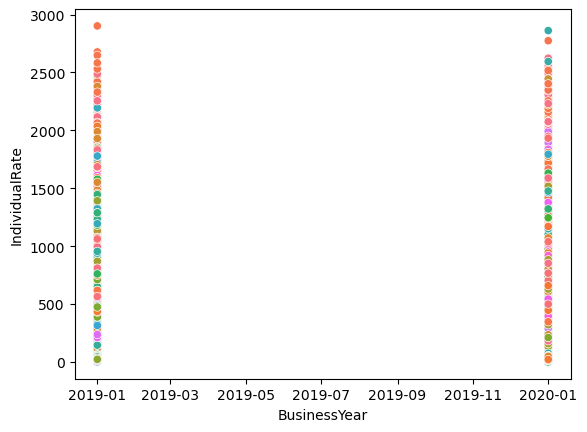

In [161]:
sns.scatterplot(data=my_df, x='BusinessYear', y = 'IndividualRate', hue='PlanId', legend=False)